### We've seen random walk which is not very exciting since this is one of the rare situations where forecasting is not really possible in the sense that you're stuck with naive forecasts, there is no model to apply in those situations

## `Moving Average`
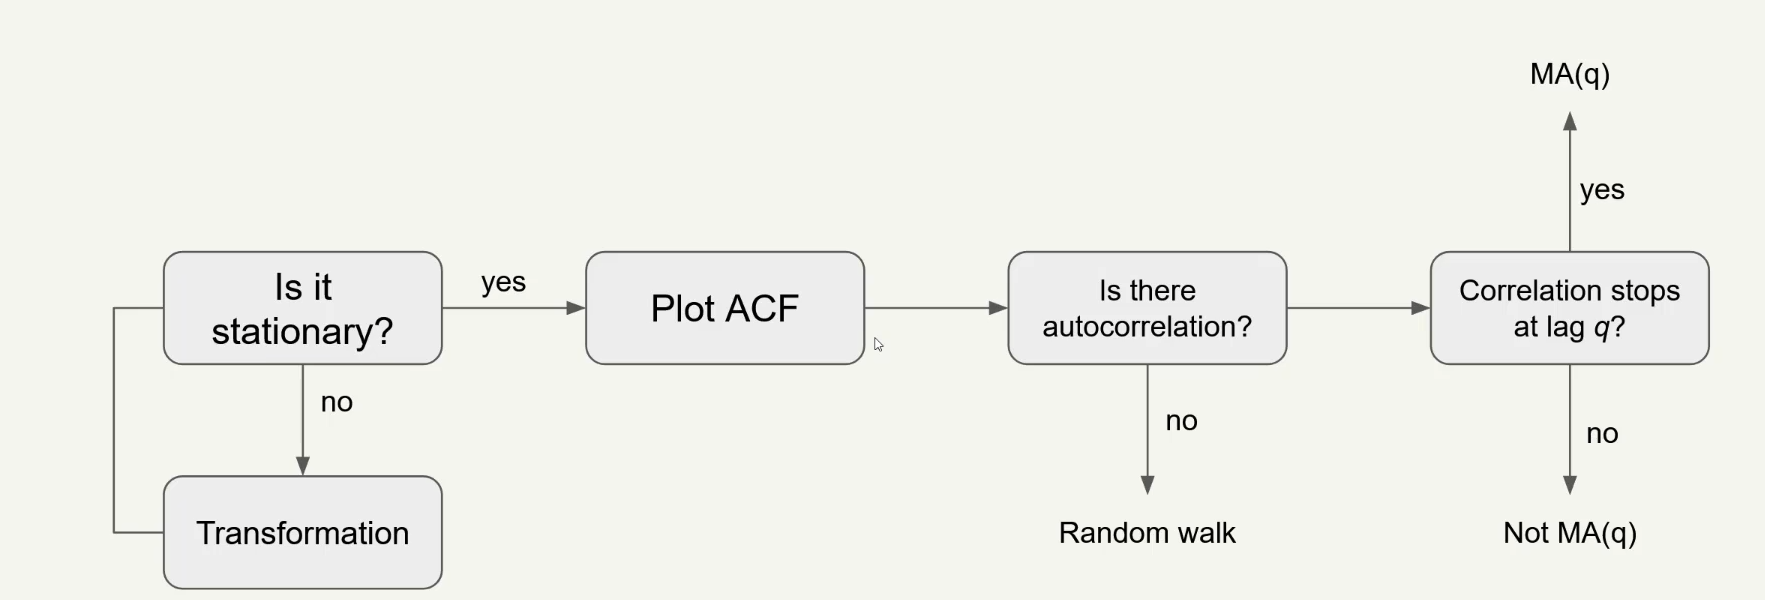

### Moving average model states that the current value depends on the current ERROR and past ERROR terms.
### Order of the model determines how many past errors we consider.
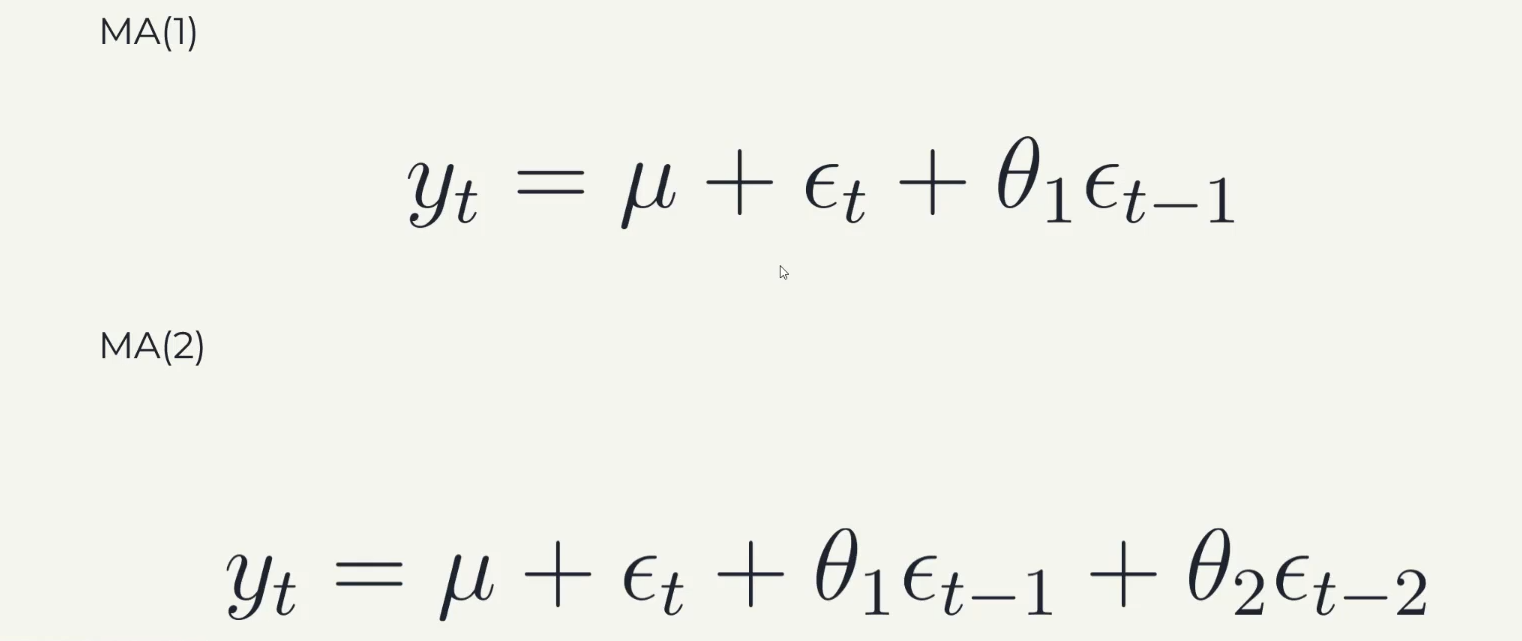



In [5]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Simulate MA Process.

In [6]:
ma1 = np.array([1,0.8])
ar1 = np.array([1,0])

ma1_process = ArmaProcess(ar1, ma1).generate_sample(10000)

In [7]:
plt.rcParams["figure.figsize"] = (9,6)

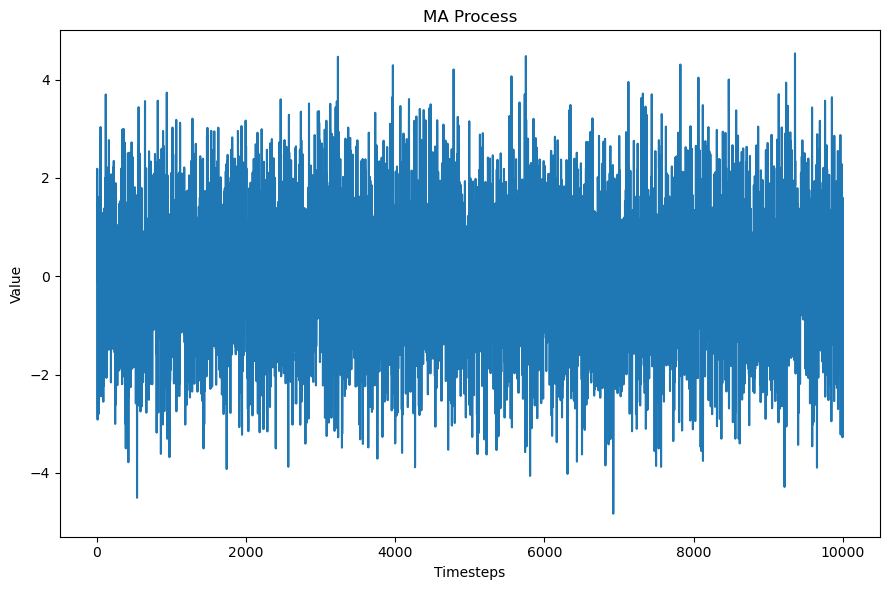

In [8]:
fig , ax = plt.subplots()

ax.plot(ma1_process)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.set_title("MA Process")
plt.tight_layout()

In [9]:
ADF_result = adfuller(ma1_process)

print(f"ADF - Test statistic : {ADF_result[0]}")
print(f"ADF - P value: {ADF_result[1]}")

ADF - Test statistic : -22.62436379547323
ADF - P value: 0.0


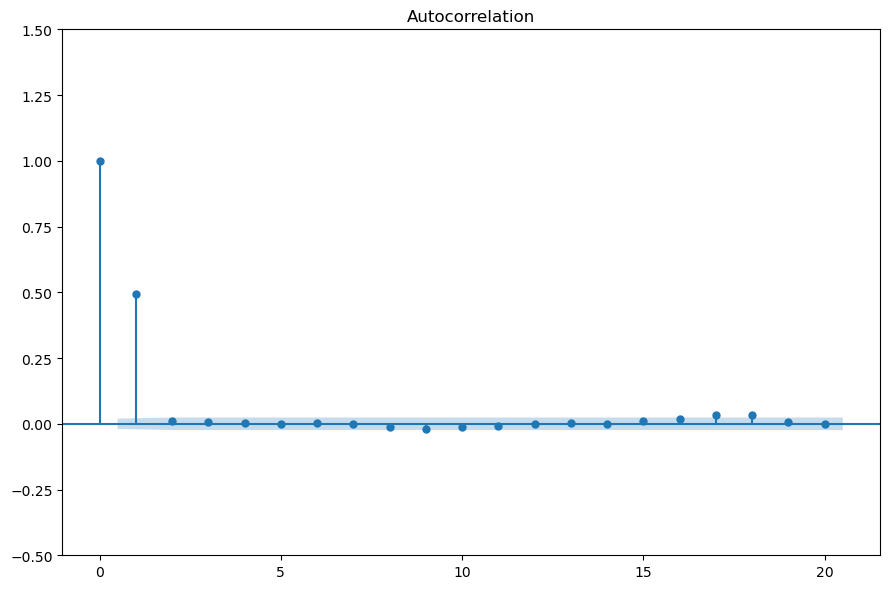

In [10]:
# Since pval < 0.05, the time series is stationary in nature.

plot_acf(ma1_process, lags=20)
plt.ylim(-0.5, 1.5)
plt.tight_layout()

## `ACF Plot is useful to determine the order of the Moving Average Process.`

In [13]:
import pandas as pd
simulated_ma_process = pd.DataFrame({"value" : ma1_process})
simulated_ma_process.head()

,value
0,-0.092373
1,-0.056992
2,2.187469
3,1.218513
4,1.137187


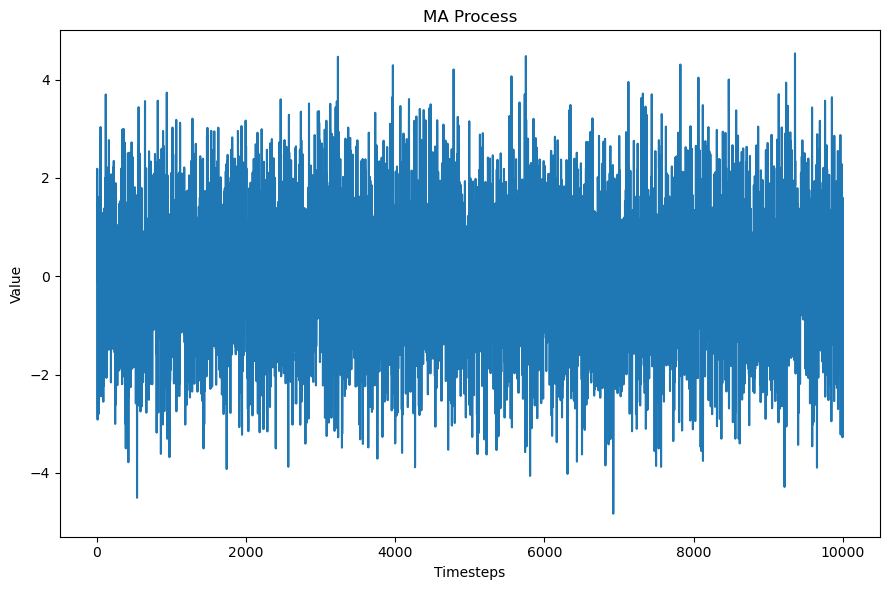

In [15]:
fig, ax = plt.subplots()
ax.plot(simulated_ma_process["value"])
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.set_title("MA Process")
plt.tight_layout()

### Train-Test Split

In [17]:
train = simulated_ma_process[:-1000]
test = simulated_ma_process[-1000:]

In [18]:
len(train) , len(test)

(9000, 1000)

### if you forecast beyond the order of the MA Model, then it is just a constant line